In [27]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas_profiling import ProfileReport
#import pandas_profiling




In [2]:
data = pd.read_csv("operations.csv",parse_dates=[0])

In [8]:
data.sample(5)


,transaction_date,label,amount,balance_bef_trn,categ,type,expense_slice,debcr,year,month,day,day_week,day_week_num,weekend,quart_month
179,2023-07-25,TRANSFER XX XX XX XX XX XX XX,1071.60,2367.24,OTHER,TRANSFER,(not an expense),credit,2023,7,25,Tuesday,2,False,4
220,2023-08-15,PRE-AUTH PAYMENT RENT,-345.00,3636.99,RENT,TRANSFER,large,debit,2023,8,15,Tuesday,2,False,2
24,2023-04-11,PAYMENT XX XX XX XX,-48.00,4538.46,OTHER,PAYMENT,small,debit,2023,4,11,Tuesday,2,False,2
256,2023-09-04,PAYMENT XX XX KIM’S XX,-13.59,3474.74,GROCERIES,PAYMENT,small,debit,2023,9,4,Monday,1,False,1
62,2023-05-09,PAYMENT XX XX XX XX,-1.12,4088.66,OTHER,PAYMENT,small,debit,2023,5,9,Tuesday,2,False,2


In [25]:
saved = data['type'].unique()

saved


array(['DONATION', 'PAYMENT', 'TRANSFER', 'OTHER', 'ATM WITHDRAWAL'],
      dtype=object)

In [6]:
profile = ProfileReport(data, title="Pandas Profiling Report")
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#  Creating graphs for qualitative data  

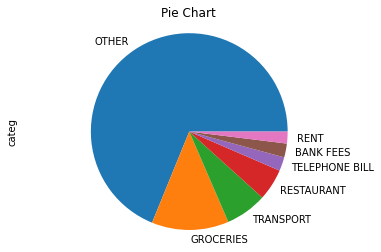

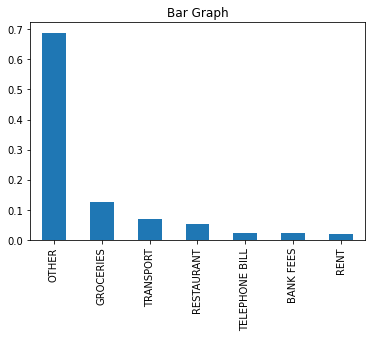

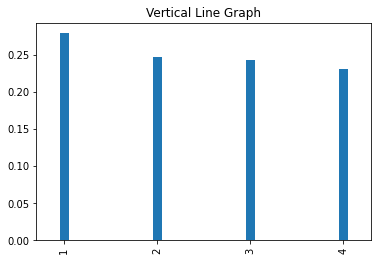

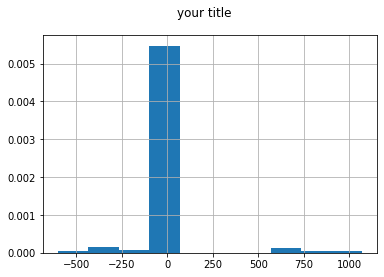

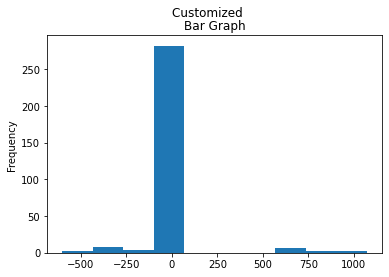

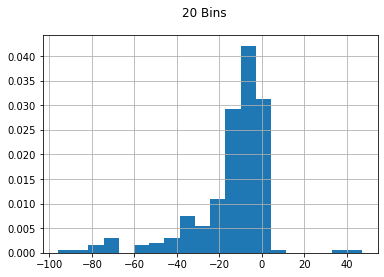

In [63]:

# QUALITATIVE VARIABLE
# Pie chart
data["categ"].value_counts(normalize=True).plot(kind='pie',  title='Pie Chart')
# This line ensures that the pie chart is circular, not elliptical
plt.axis('equal') 
plt.show() # Displays the graph

# Bar graph
data["categ"].value_counts(normalize=True).plot(kind='bar', title='Bar Graph')
plt.show()

# QUANTITATIVE VARIABLE
# Vertical line graph
data["quart_month"].value_counts(normalize=True).plot(kind='bar',width=0.1,  title='Vertical Line Graph')
plt.show()

# Histogram
data["amount"].hist(density=True)
                                      
plt.suptitle("your title")
plt.show()

#remake of graph
data["amount"].plot(kind='hist', title='Bar Graph')
plt.suptitle('Customized ')
plt.show()

# Prettier Histogram
data[data.amount.abs() < 100]["amount"].hist(density=True,bins=20)
plt.suptitle('20 Bins')
plt.show()

In [40]:
 s = pd.Series([3, 1, 2, 3, 4, np.nan])
s.value_counts(normalize=True)

3.0    0.4
1.0    0.2
2.0    0.2
4.0    0.2
dtype: float64

In [42]:
>>> s = pd.Series([3, 1, 2, 3, 4, np.nan])
>>> s.value_counts()

3.0    2
1.0    1
2.0    1
4.0    1
dtype: int64

In [48]:
data.categ.value_counts()

OTHER             212
GROCERIES          39
TRANSPORT          21
RESTAURANT         16
TELEPHONE BILL      7
BANK FEES           7
RENT                6
Name: categ, dtype: int64

<AxesSubplot:ylabel='Frequency'>

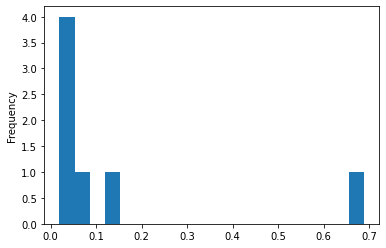

In [67]:
data.categ.value_counts(normalize = True,ascending=True).plot(kind="hist", bins= 20)

# Creating table for qantitative data

In [69]:
occurrences = data["quart_month"].value_counts()
categories = occurrences.index # the occurrences index contains the categories

tab = pd.DataFrame(categories, columns = ["quart_month"]) # creation of table based on categories
tab["n"] = occurrences.values
tab["f"] = tab["n"] / len(data) # len(data) returns the sample size

In [70]:
tab = tab.sort_values("quart_month") # sorts values of variable X (increasing)
tab["F"] = tab["f"].cumsum() # cumsum calculates the cumulative sum


In [72]:
tab

,quart_month,n,f,F
0,1,86,0.279221,0.279221
1,2,76,0.246753,0.525974
2,3,75,0.243506,0.769481
3,4,71,0.230519,1.000000


<AxesSubplot:title={'center':'Bar Graph'}>

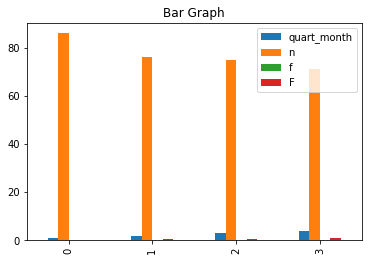

In [73]:
tab.plot(kind='bar', title='Bar Graph')